In [1]:
import yt
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import integrate
from matplotlib.legend_handler import HandlerLine2D

In [4]:
rho_c = 1.0

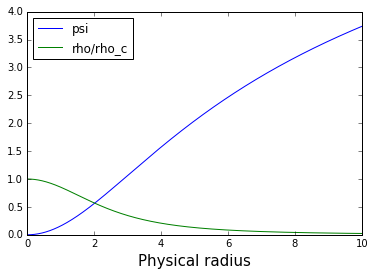

In [19]:
xi_max = 10
from scipy import integrate
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
# r = xi/(3.118e-8) #[cm]
plt.plot(xi,asol[:,0],label ='psi')#$\psi$' )
plt.plot(xi,rho,label ='rho/rho_c')#$\rho$')
plt.xlabel("Physical radius",fontsize=15)
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In [23]:
print min(np.where(rho_c/rho>14.1)[0])
print min(np.where(rho_c/rho>20)[0])

647
745


In [28]:
1./rho[745]

20.030667873735172

In [25]:
7.45/(3.188e-8)

233688833.12421584

In [3]:
cd ~/project/FLASH4.3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3/object


In [6]:
def plot_all(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
    slc.set_cmap("all","rainbow")
    slc.show()

    physical_quantity="pressure"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
    slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()

    physical_quantity="temperature"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
    # slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()


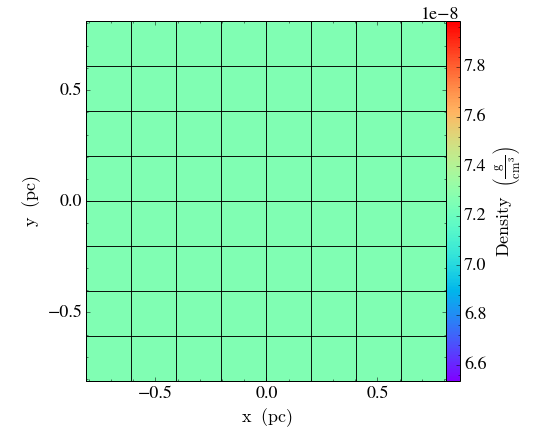


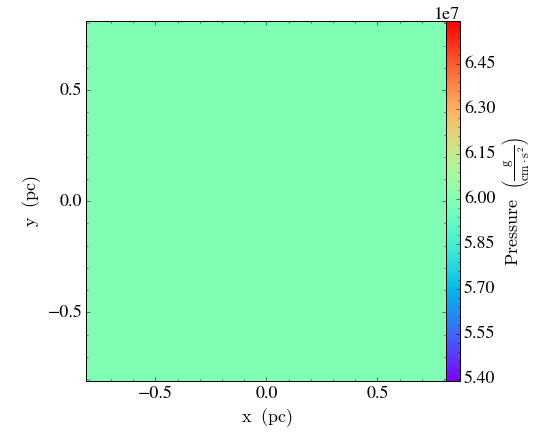


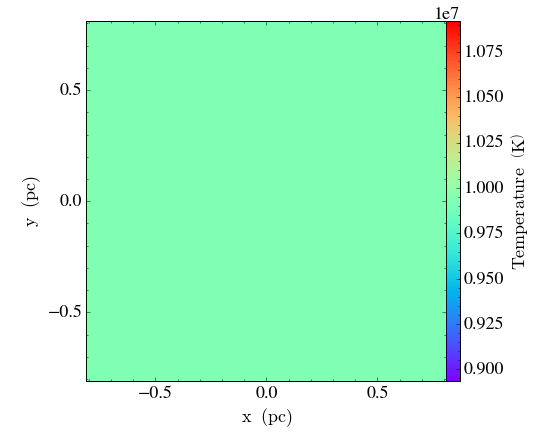

In [31]:
plot_all(0)

forgot to change the xmin,ymin


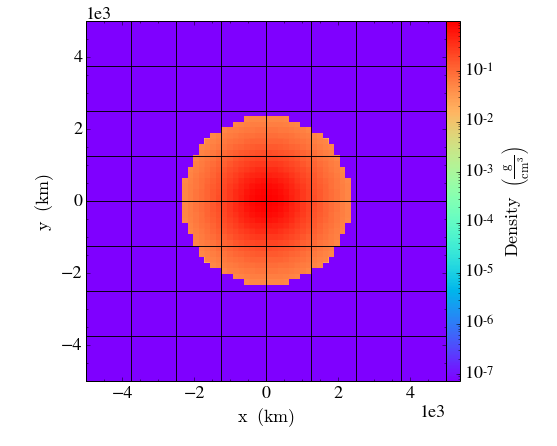


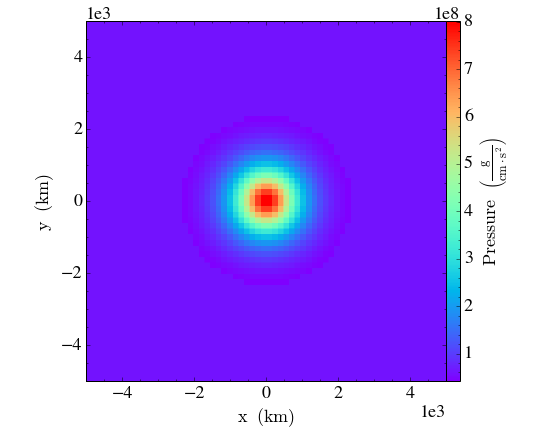


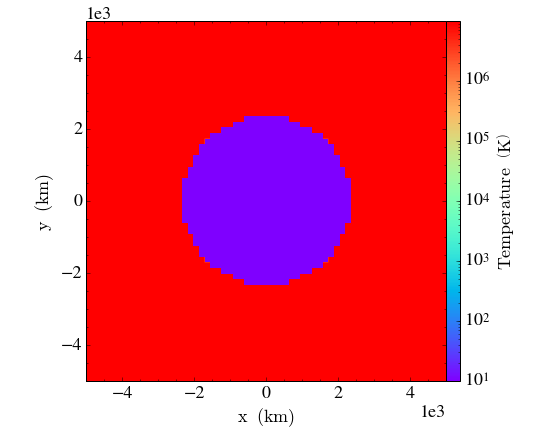

In [7]:
plot_all(0)


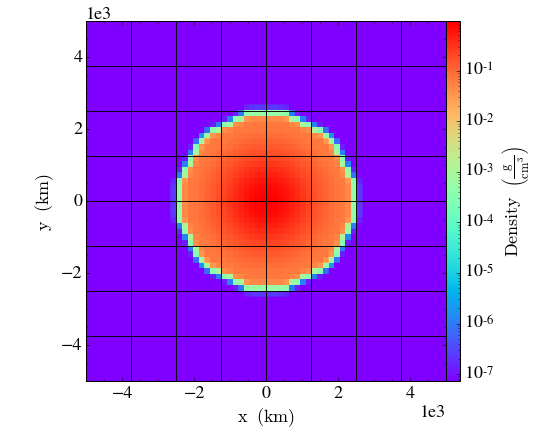


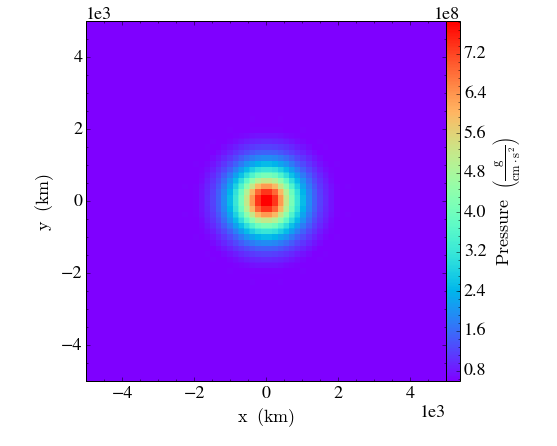


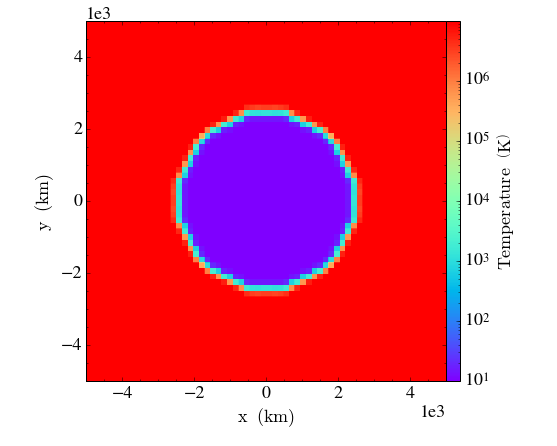

In [8]:
plot_all(1)

It stopped because it toook  1000 timesteps , I think we need to adjust the timestpe a bit. Right now its taking about dt  = 0.27 

In [2]:
def plot_dens(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
    slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    slc.show()


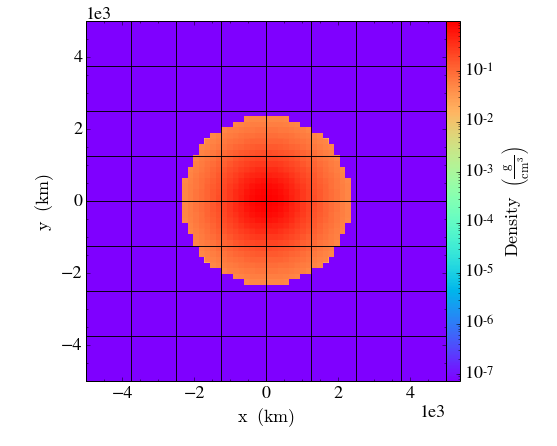


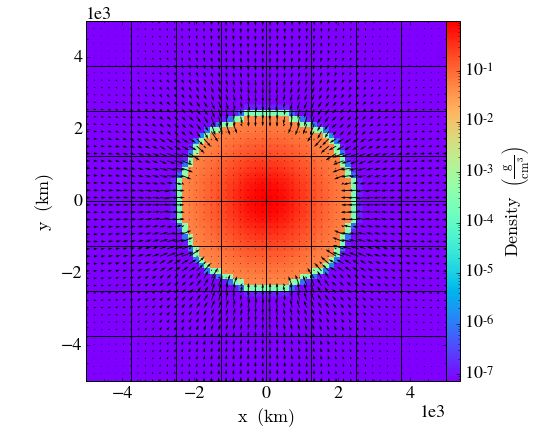


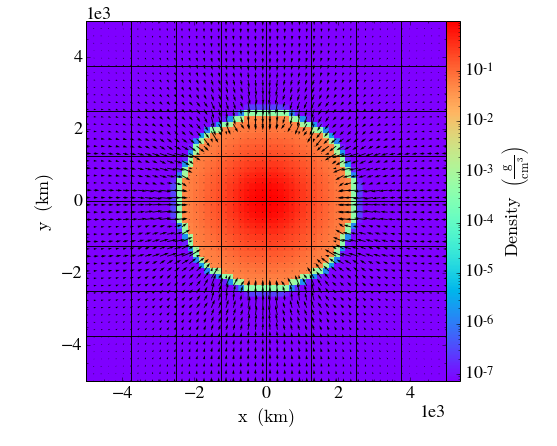


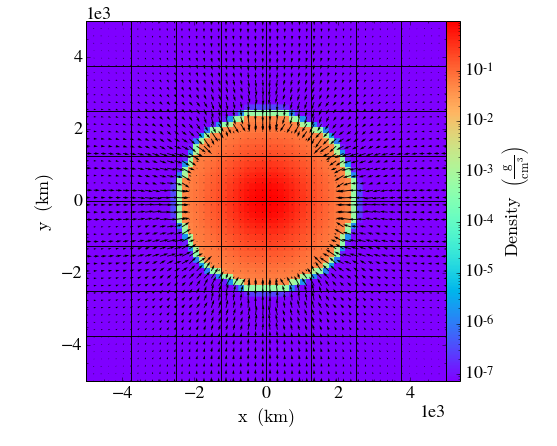


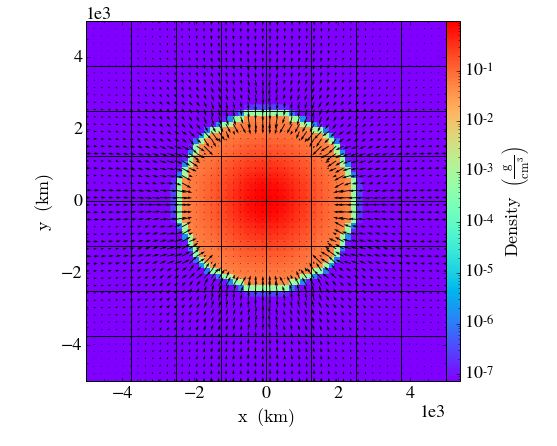


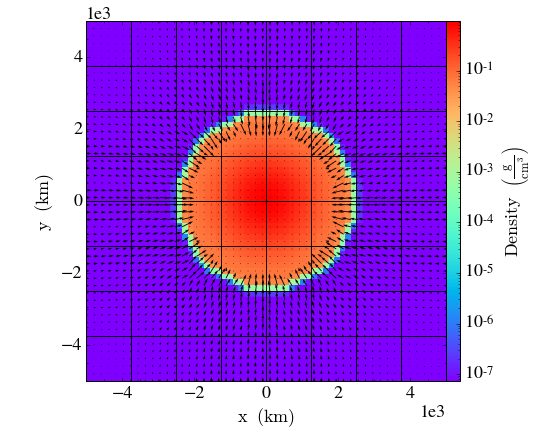


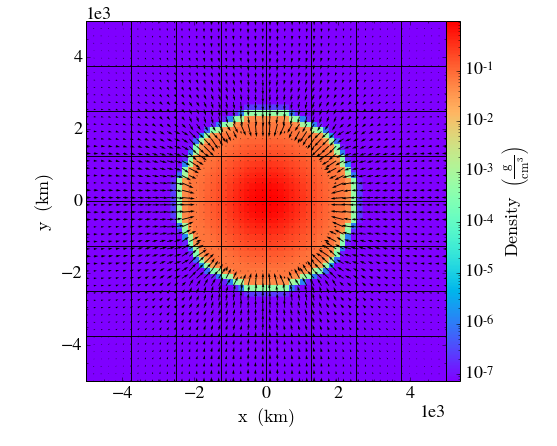


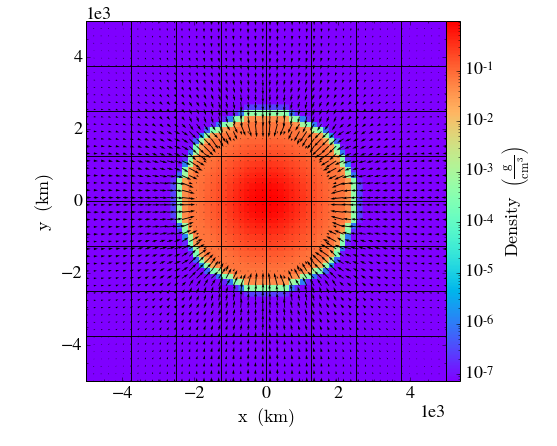


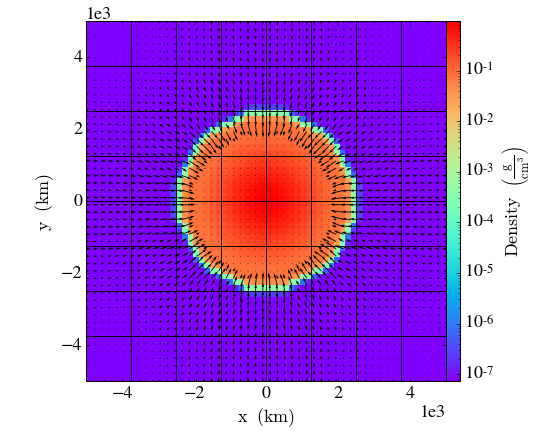


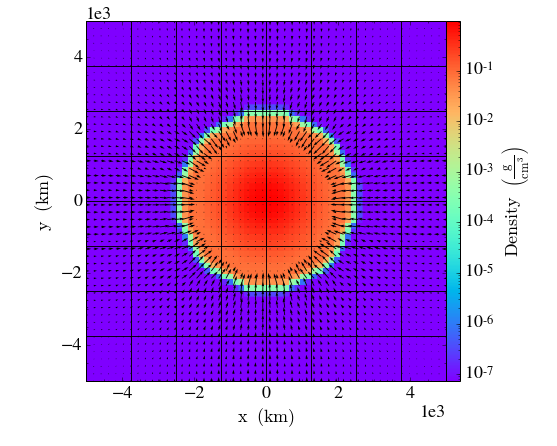


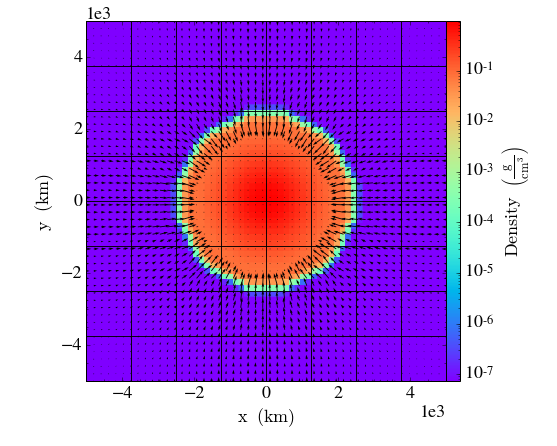


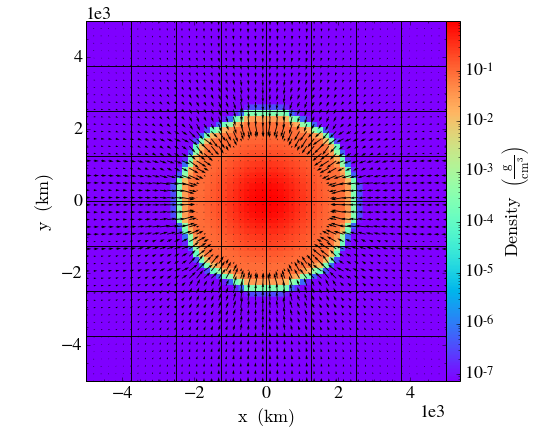


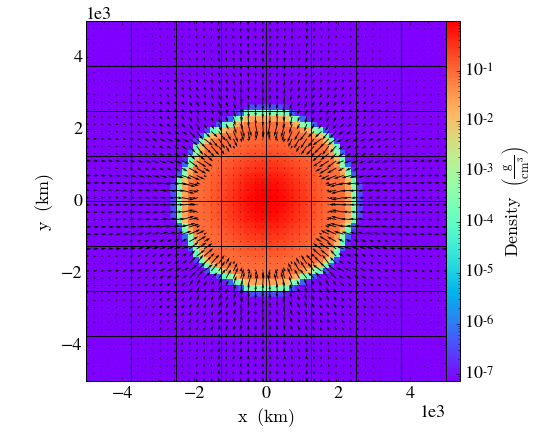


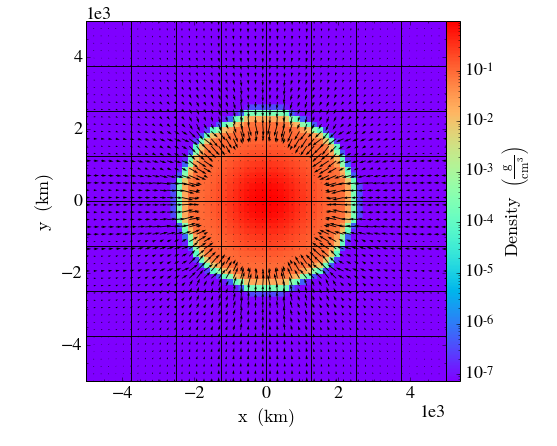


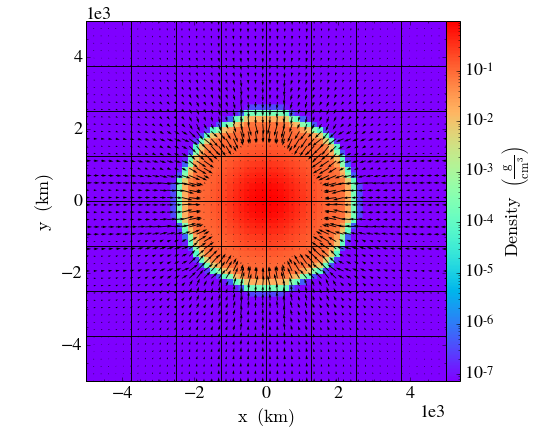

In [18]:
for i in np.arange(141):
    if i%10==0:
        plot_dens(i)

In 25 minutes, it went through 2070 s  of simulation time. Which is around 1 tff!!


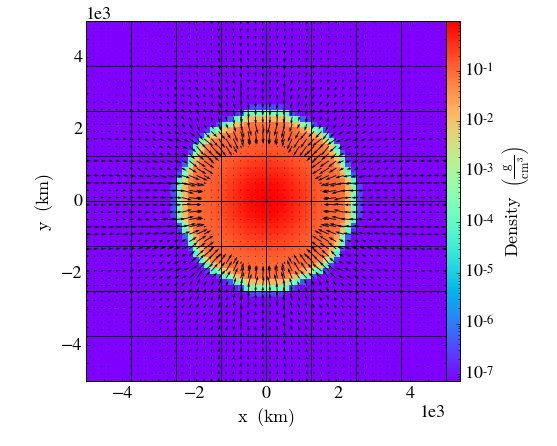


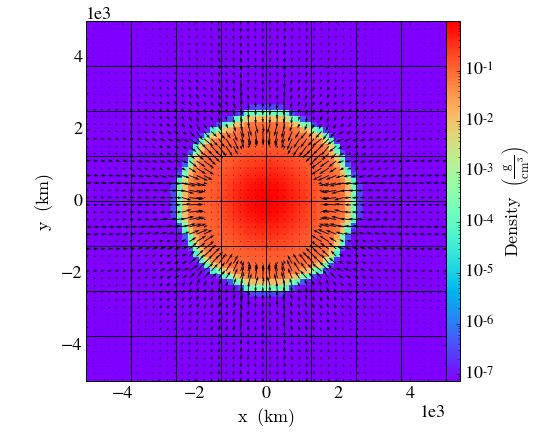


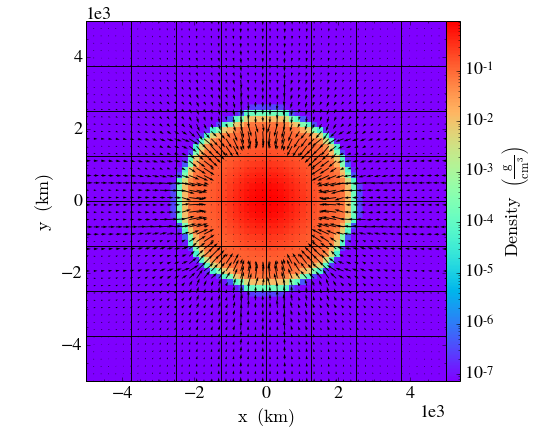


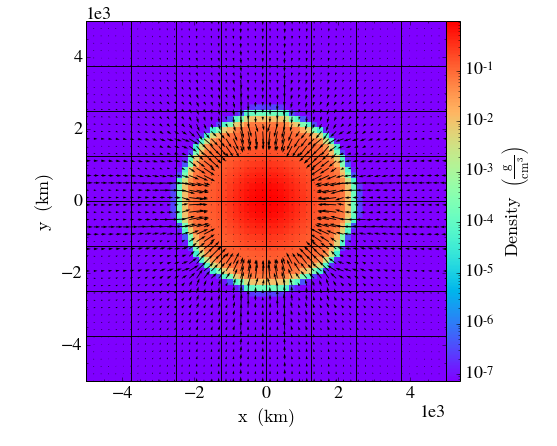


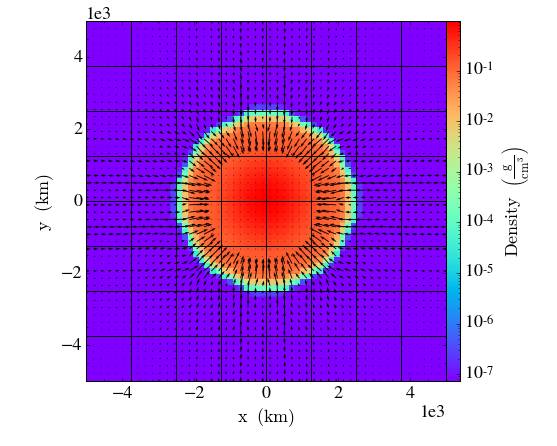


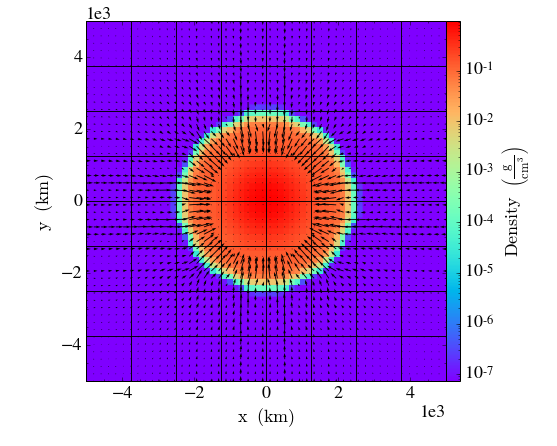

In [19]:
for i in np.arange(141,208):
    if i%10==0:
        plot_dens(i)

turn on AMR to see performance 


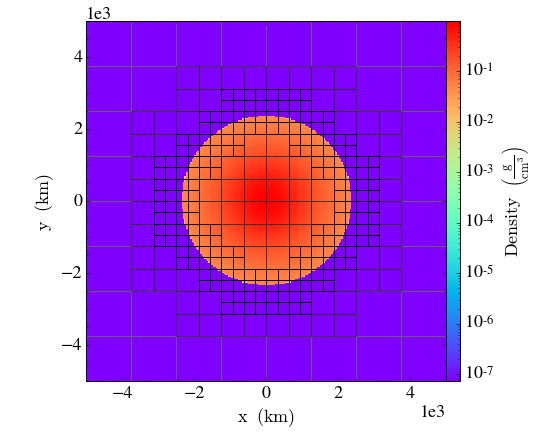

In [20]:
plot_dens(0)

dt = 6.791E-02 which is slightly smaller than the unigrid on dt = 0.27, but very fine!

So I went down one level max to see if it helps with the time ..etc 


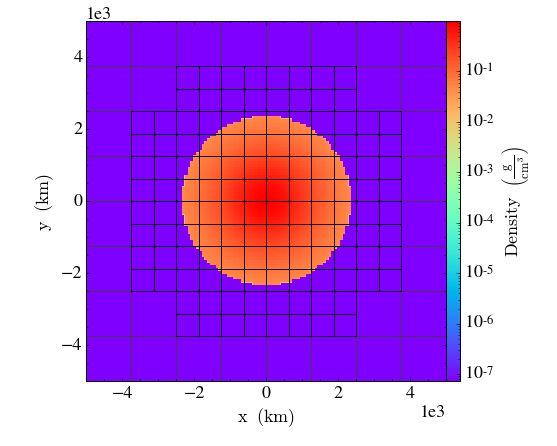

In [5]:
plot_dens(0)

this is definitely grainier dt increased to 1.358E-01 so I think its decent. We'll keep this for the 3 hr run

also why is dt not changing at all ? It seems to stay constant throughout all t 